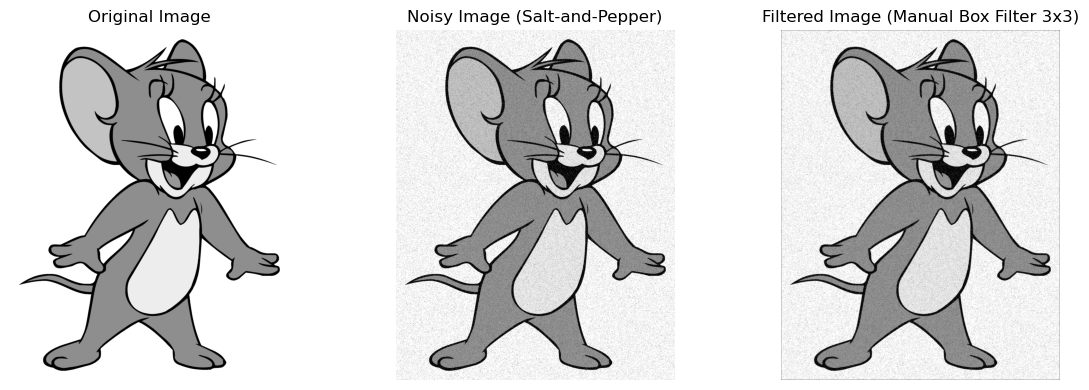

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('fish.jpg', cv2.IMREAD_GRAYSCALE)
salt_prob = 0.05  
pepper_prob = 0.05  

noisy_image = np.copy(image)

num_salt = np.ceil(salt_prob * image.size)
coords_salt = [np.random.randint(0, i, int(num_salt)) for i in image.shape]
noisy_image[tuple(coords_salt)] = 255

num_pepper = np.ceil(pepper_prob * image.size)
coords_pepper = [np.random.randint(0, i, int(num_pepper)) for i in image.shape]
noisy_image[tuple(coords_pepper)] = 0

filtered_image = np.zeros_like(noisy_image)  
height, width = noisy_image.shape

for i in range(1, height - 1):
    for j in range(1, width - 1):
        neighborhood = noisy_image[i - 1:i + 2, j - 1:j + 2]
        
        filtered_value = np.mean(neighborhood)
        
        filtered_image[i, j] = filtered_value

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image (Salt-and-Pepper)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Manual Box Filter 3x3)')
plt.axis('off')

plt.tight_layout()
plt.show()


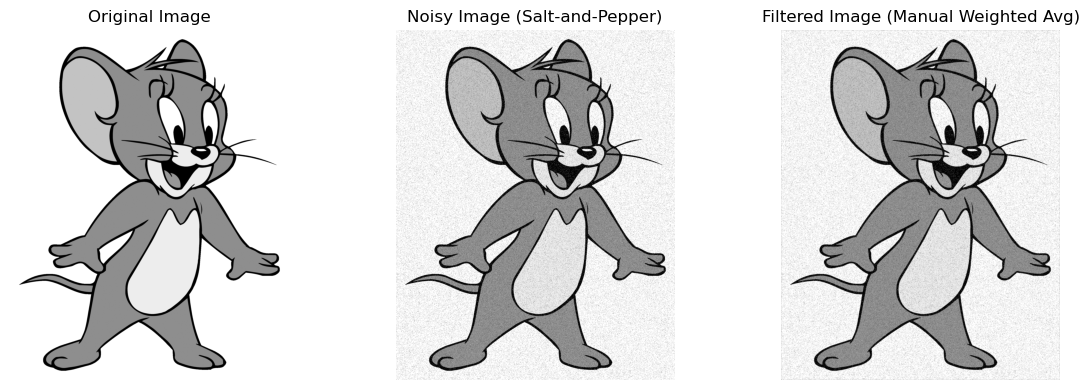

In [7]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('fish.jpg', cv2.IMREAD_GRAYSCALE)

salt_prob = 0.05  
pepper_prob = 0.05  


noisy_image = np.copy(image)

num_salt = np.ceil(salt_prob * image.size)
coords_salt = [np.random.randint(0, i, int(num_salt)) for i in image.shape]
noisy_image[tuple(coords_salt)] = 255

num_pepper = np.ceil(pepper_prob * image.size)
coords_pepper = [np.random.randint(0, i, int(num_pepper)) for i in image.shape]
noisy_image[tuple(coords_pepper)] = 0

kernel = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]]) / 16.0  

image_height, image_width = noisy_image.shape
kernel_size = kernel.shape[0]  
pad = kernel_size // 2

padded_image = np.pad(noisy_image, pad, mode='constant', constant_values=0)

filtered_image = np.zeros_like(noisy_image)

for i in range(pad, image_height + pad):
    for j in range(pad, image_width + pad):
        roi = padded_image[i - pad:i + pad + 1, j - pad:j + pad + 1]
        
        filtered_value = np.sum(roi * kernel)
        
        filtered_image[i - pad, j - pad] = np.clip(filtered_value, 0, 255)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image (Salt-and-Pepper)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Manual Weighted Avg)')
plt.axis('off')

plt.tight_layout()
plt.show()


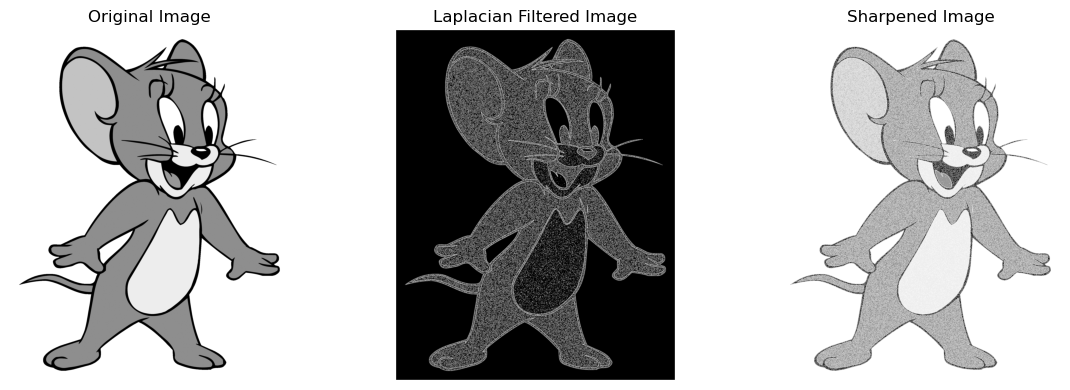

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('Fish.jpg', cv2.IMREAD_GRAYSCALE)

blurred_image = cv2.GaussianBlur(image, (3, 3), 0)

laplacian_kernel = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])

image_height, image_width = blurred_image.shape
kernel_height, kernel_width = laplacian_kernel.shape
pad_height = kernel_height // 2
pad_width = kernel_width // 2

padded_image = np.pad(blurred_image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

laplacian_image = np.zeros_like(blurred_image)

for i in range(image_height):
    for j in range(image_width):
        region = padded_image[i:i + kernel_height, j:j + kernel_width]
        laplacian_value = np.sum(region * laplacian_kernel)
        laplacian_image[i, j] = laplacian_value

laplacian_image = np.clip(laplacian_image, 0, 255).astype(np.uint8)

sharpened_image = cv2.add(image, laplacian_image)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(laplacian_image, cmap='gray')
plt.title('Laplacian Filtered Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.tight_layout()
plt.show()



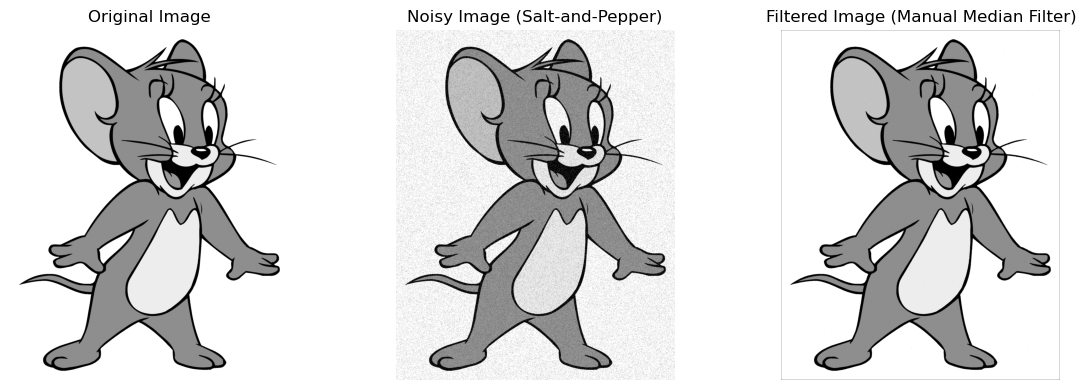

In [8]:


import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('fish.jpg', cv2.IMREAD_GRAYSCALE)

salt_prob = 0.05  
pepper_prob = 0.05  

noisy_image = np.copy(image)

num_salt = np.ceil(salt_prob * image.size)
coords_salt = [np.random.randint(0, i, int(num_salt)) for i in image.shape]
noisy_image[tuple(coords_salt)] = 255

num_pepper = np.ceil(pepper_prob * image.size)
coords_pepper = [np.random.randint(0, i, int(num_pepper)) for i in image.shape]
noisy_image[tuple(coords_pepper)] = 0

filtered_image = np.zeros_like(noisy_image)  # Create an empty output image

height, width = noisy_image.shape

for i in range(1, height - 1):
    for j in range(1, width - 1):
        neighborhood = noisy_image[i - 1:i + 2, j - 1:j + 2]
        
        median_value = np.median(neighborhood)
        
        filtered_image[i, j] = median_value

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image (Salt-and-Pepper)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Manual Median Filter)')
plt.axis('off')

plt.tight_layout()
plt.show()


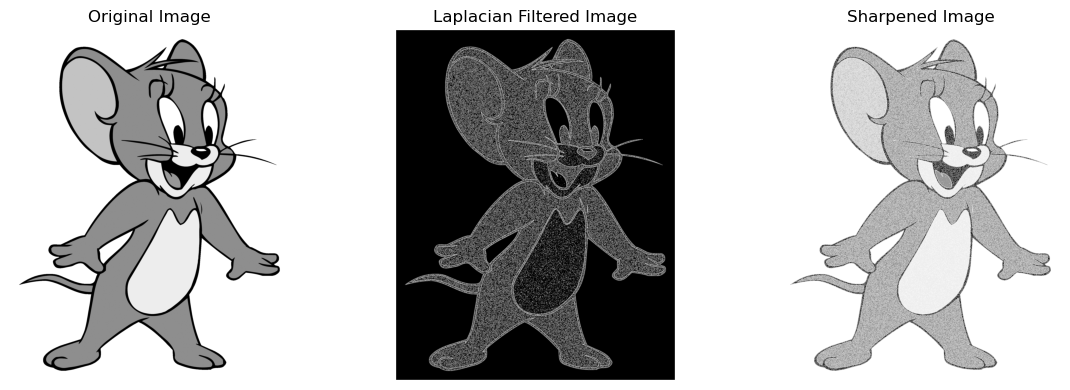

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('Fish.jpg', cv2.IMREAD_GRAYSCALE)

blurred_image = cv2.GaussianBlur(image, (3, 3), 0)

laplacian_kernel = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])

image_height, image_width = blurred_image.shape
kernel_height, kernel_width = laplacian_kernel.shape

pad_height = kernel_height // 2
pad_width = kernel_width // 2

padded_image = np.pad(blurred_image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

laplacian_image = np.zeros_like(blurred_image)

for i in range(image_height):
    for j in range(image_width):
        region = padded_image[i:i + kernel_height, j:j + kernel_width]
        laplacian_value = np.sum(region * laplacian_kernel)
        laplacian_image[i, j] = laplacian_value

laplacian_image = np.clip(laplacian_image, 0, 255).astype(np.uint8)

sharpened_image = cv2.add(image, laplacian_image)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(laplacian_image, cmap='gray')
plt.title('Laplacian Filtered Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.tight_layout()
plt.show()


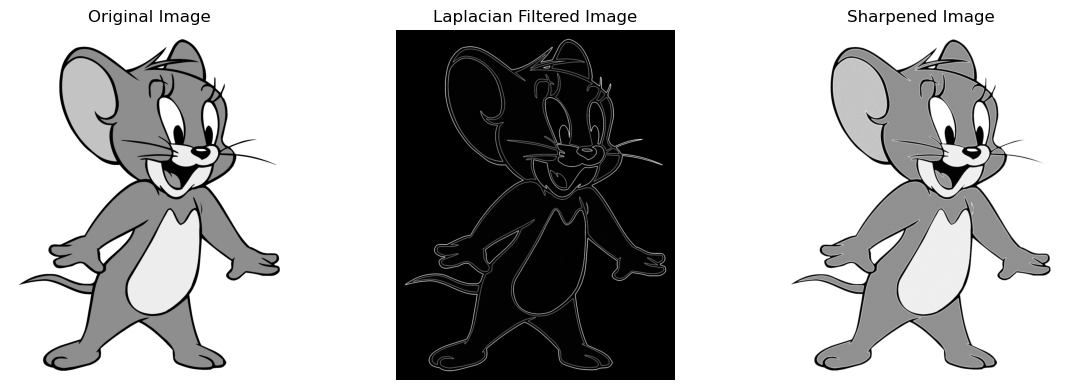

In [10]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('fish.jpg', cv2.IMREAD_GRAYSCALE)

blurred_image = cv2.GaussianBlur(image, (3, 3), 0)

laplacian_image = cv2.Laplacian(blurred_image, cv2.CV_64F, ksize=3)

laplacian_image = np.absolute(laplacian_image)
laplacian_image = np.clip(laplacian_image, 0, 255).astype(np.uint8)

sharpened_image = cv2.add(image, laplacian_image)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(laplacian_image, cmap='gray')
plt.title('Laplacian Filtered Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.tight_layout()
plt.show()
